# Лабораторная работа №2

Пусть случайная величина ξ имеет распределение, задаваемое плотно-
стью fξ(x) = θ2xe−θx. Для каждого θ ∈ {0.5, 2, 8}:

1

(a) Аналитически вычислить математическое ожидание, дисперсию и
математическое ожидание квадрата ξ. Привести в отчет.

(b) Для k ∈ {24, 25, . . . , 215} построить выборку из k элементов. Для
каждой из них посчитать оценки: математического ожидания, дис-
персии и квадрата математического ожидания параметра из вари-
анта. Для каждой из выборок и оценок визуализировать это все
на графиках (для каждой оценки — свой график), где по верти-
кальной оси — оценка, а по горизонтальной — k, плюс, добавьте
горизонтальную линию, отвечающую за аналитически полученную
оценку.

# Решение 1

Для гамма-распределения Gamma(α, λ):

$$
\mathbb{E}\xi = \frac{\alpha}{\lambda},
\qquad
\mathbb{D}\xi = \frac{\alpha}{\lambda^2},
\qquad
\mathbb{E}\xi^2 = \frac{\alpha(\alpha+1)}{\lambda^2}.
$$

При α = 2:

$$
\mathbb{E}\xi = \frac{2}{\theta}, \qquad
\mathbb{D}\xi = \frac{2}{\theta^2}, \qquad
\mathbb{E}\xi^2 = \frac{6}{\theta^2}.
$$

Аналитические значения:

- При θ = 0.5:

  $$
  \mathbb{E}\xi = 4,\quad
  \mathbb{D}\xi = 8,\quad
  \mathbb{E}\xi^2 = 24.
  $$

- При θ = 2:

  $$
  \mathbb{E}\xi = 1,\quad
  \mathbb{D}\xi = 0.5,\quad
  \mathbb{E}\xi^2 = 1.5.
  $$

- При θ = 8:

  $$
  \mathbb{E}\xi = 0.25,\quad
  \mathbb{D}\xi = 0.03125,\quad
  \mathbb{E}\xi^2 = 0.09375.
  $$

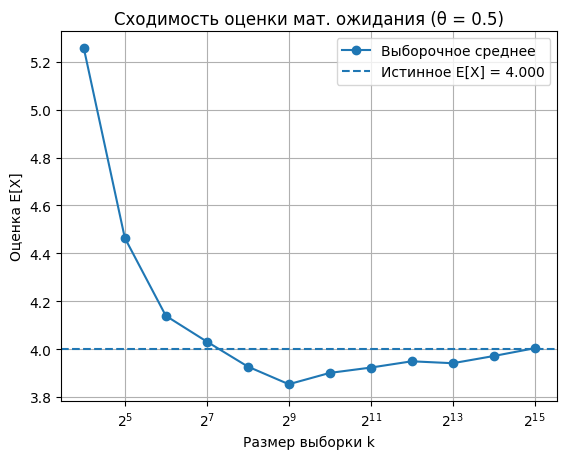

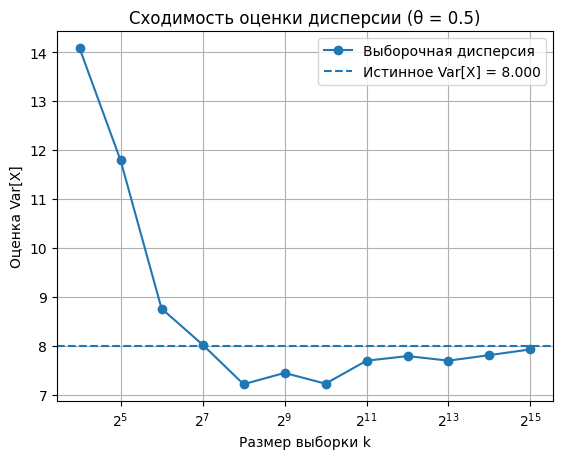

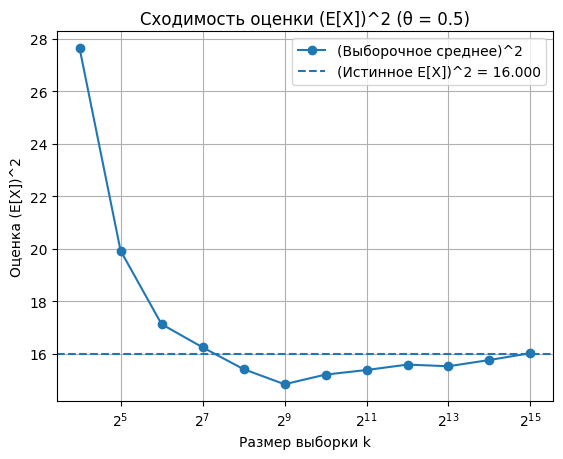

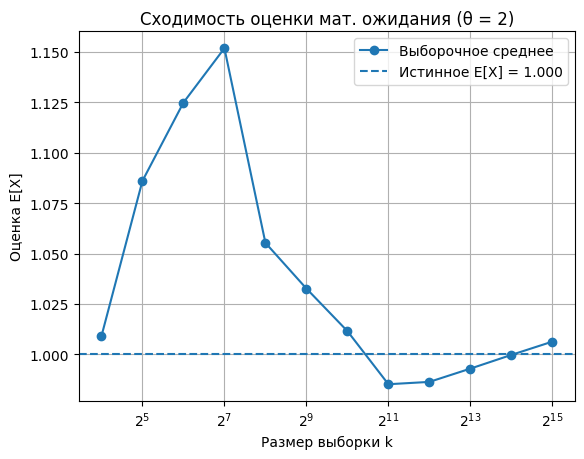

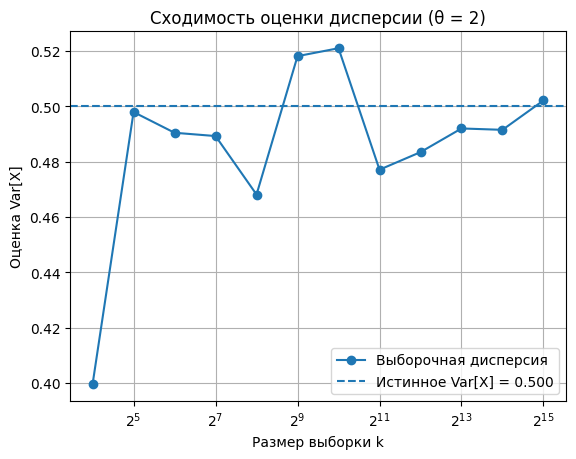

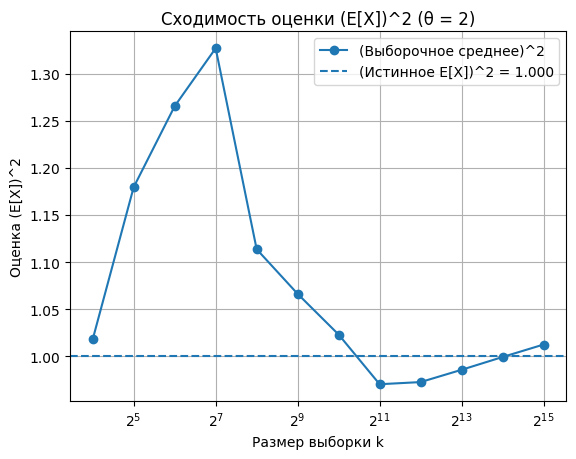

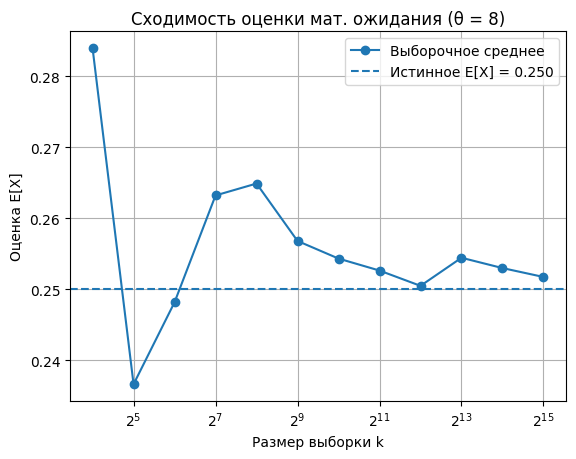

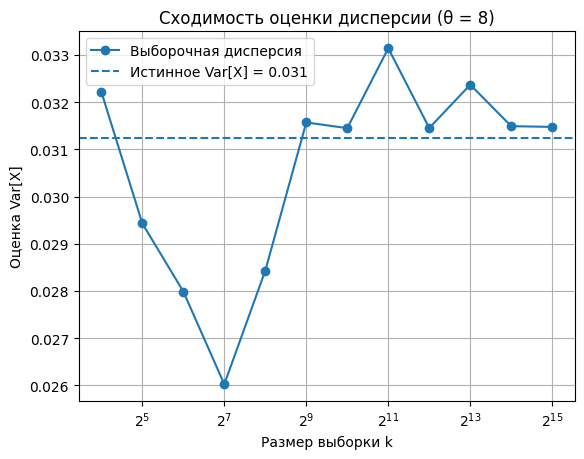

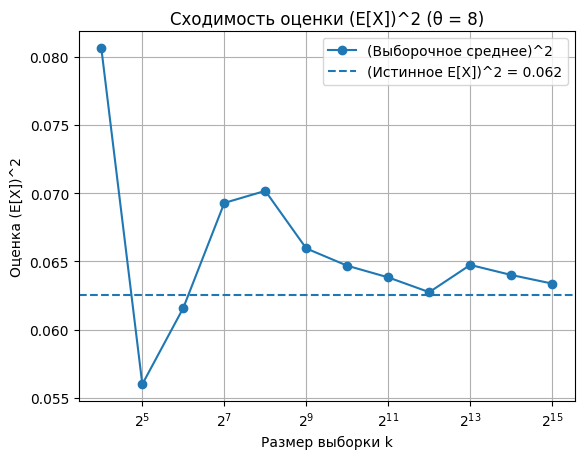

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

thetas = [0.5, 2, 8]
ks = [2**k for k in range(4, 16)]

def true_moments(theta):
    EX = 2 / theta
    VarX = 2 / theta**2
    EX2 = 6 / theta**2
    return EX, VarX, EX2

results_11 = {}# оценки θ

for theta in thetas:
    max_n = max(ks)
    sample = np.random.gamma(shape=2, scale=1/theta, size=max_n)

    mean_estimates = []
    var_estimates = []
    sq_mean_estimates = []

    for k in ks:
        subsample = sample[:k]
        mean_k = subsample.mean()
        var_k = subsample.var(ddof=1)
        sq_mean_k = mean_k**2

        mean_estimates.append(mean_k)
        var_estimates.append(var_k)
        sq_mean_estimates.append(sq_mean_k)

    results_11[theta] = {
        "mean": np.array(mean_estimates),
        "var": np.array(var_estimates),
        "sq_mean": np.array(sq_mean_estimates),
    }

for theta in thetas:
    EX, VarX, EX2 = true_moments(theta)

    plt.figure()
    plt.plot(ks, results_11[theta]["mean"], marker='o', label='Выборочное среднее')
    plt.axhline(EX, linestyle='--', label=f'Истинное E[X] = {EX:.3f}')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Оценка E[X]')
    plt.title(f'Сходимость оценки мат. ожидания (θ = {theta})')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(ks, results_11[theta]["var"], marker='o', label='Выборочная дисперсия')
    plt.axhline(VarX, linestyle='--', label=f'Истинное Var[X] = {VarX:.3f}')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Оценка Var[X]')
    plt.title(f'Сходимость оценки дисперсии (θ = {theta})')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(ks, results_11[theta]["sq_mean"], marker='o', label='(Выборочное среднее)^2')
    plt.axhline(EX**2, linestyle='--', label=f'(Истинное E[X])^2 = {EX**2:.3f}')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Оценка (E[X])^2')
    plt.title(f'Сходимость оценки (E[X])^2 (θ = {theta})')
    plt.legend()
    plt.grid(True)
    plt.show()


Дана плотность распределения{случайной величины ξ:
λ,a
λe−λ(x−a), x ≥ a
fξ (x) = 0,
else
Пусть (λ, a) = (2, 2)

(a) Аналитически вычислите значение моды, математического ожида-
ния и медианы.

(b) Создайте две выборки: одну довольно большого размера (10000
наблюдений, например), а вторую маленькую (например, 20). По-
стройте оценки моды, математического жидания и медианы.

(c) Постройте для первой выборки на одном графике: гистограмму
распределения значений из выборки и три вертикальных линии
оценок моды, математического ожидания и медианы. Для второй
выборки сделайте то же самое. Постройте ещё график рядом для
первой выборки, но с функцией распределения плотности и анали-
тическими значениями мод, математического жидания и медианы.
То же самое, для второй.
(d) Попробуйте поизменять размер выборки и посмотреть на то, на-
пример, сходится ли медиана к математическому ожиданию, или
нет.

# Решение 2

Плотность распределения:

$$
f_{\lambda,a}(x) =
\begin{cases}
\lambda e^{-\lambda(x-a)}, & x \ge a, \\
0, & x < a.
\end{cases}
$$

При λ = 2 и a = 2:

$$moda = 2,$$

$$\mathbb{E}\xi = 2.5,$$

$$ median = 2 + \frac{\ln 2}{2} \approx 2.3466.$$



Большая выборка (n = 10000):
Оценка мат. ожидания = 2.4981
Оценка медианы = 2.3439
Оценка моды (по гист)= 2.0540

Малая выборка (n = 20):
Оценка мат. ожидания = 2.3329
Оценка медианы = 2.2507
Оценка моды (по гист) = 2.1709


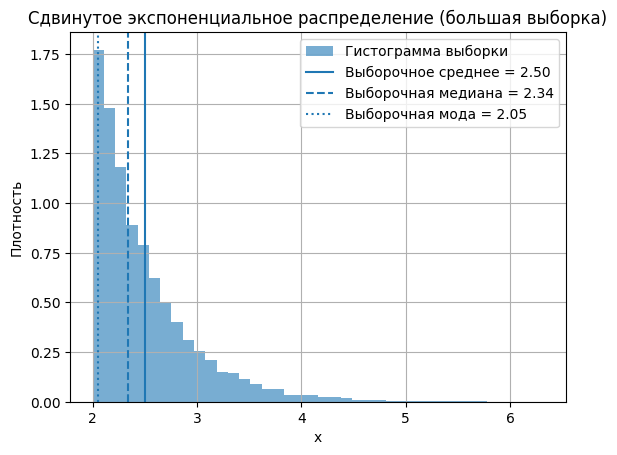

In [3]:
lambda_param = 2.0
a_param = 2.0

mode_theor = a_param
EX_theor = a_param + 1 / lambda_param
median_theor = a_param + np.log(2) / lambda_param

def sample_shifted_exp(n, lam, a):
    U = np.random.rand(n)
    return a - (1/lam) * np.log(U)

def estimate_mode_hist(sample, bins=30):
    #Грубая оценка моды по максимуму гистограммы
    hist, bin_edges = np.histogram(sample, bins=bins, density=True)
    idx_max = np.argmax(hist)
    mode_est = 0.5 * (bin_edges[idx_max] + bin_edges[idx_max + 1])  # центр
    return mode_est

n_big = 10000
n_small = 20

sample_big = sample_shifted_exp(n_big, lambda_param, a_param)
sample_small = sample_shifted_exp(n_small, lambda_param, a_param)

# Оценки для большой выборки
mean_big = sample_big.mean()
median_big = np.median(sample_big)
mode_big = estimate_mode_hist(sample_big, bins=40)

print("\nБольшая выборка (n = 10000):")
print(f"Оценка мат. ожидания = {mean_big:.4f}")
print(f"Оценка медианы = {median_big:.4f}")
print(f"Оценка моды (по гист)= {mode_big:.4f}")

mean_small = sample_small.mean()
median_small = np.median(sample_small)
mode_small = estimate_mode_hist(sample_small, bins=10)

print("\nМалая выборка (n = 20):")
print(f"Оценка мат. ожидания = {mean_small:.4f}")
print(f"Оценка медианы = {median_small:.4f}")
print(f"Оценка моды (по гист) = {mode_small:.4f}")

def f_shifted_exp(x, lam, a):
    y = np.zeros_like(x)
    mask = (x >= a)
    y[mask] = lam * np.exp(-lam * (x[mask] - a))
    return y

x_grid = np.linspace(a_param, a_param + 5, 400)
pdf_vals = f_shifted_exp(x_grid, lambda_param, a_param)

plt.figure()
plt.hist(sample_big, bins=40, density=True, alpha=0.6, label='Гистограмма выборки')

plt.axvline(mean_big, linestyle='-', label=f'Выборочное среднее = {mean_big:.2f}')
plt.axvline(median_big, linestyle='--', label=f'Выборочная медиана = {median_big:.2f}')
plt.axvline(mode_big, linestyle=':', label=f'Выборочная мода = {mode_big:.2f}')

plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Сдвинутое экспоненциальное распределение (большая выборка)')
plt.legend()
plt.grid(True)
plt.show()


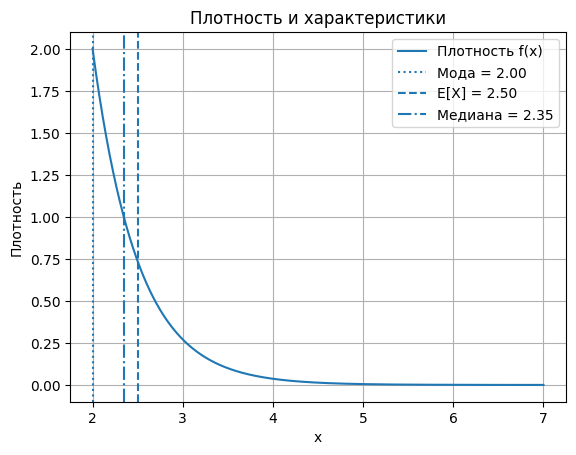

In [5]:
plt.figure()
plt.plot(x_grid, pdf_vals, label='Плотность f(x)')
plt.axvline(mode_theor, linestyle=':', label=f'Мода = {mode_theor:.2f}')
plt.axvline(EX_theor, linestyle='--', label=f'E[X] = {EX_theor:.2f}')
plt.axvline(median_theor, linestyle='-.', label=f'Медиана = {median_theor:.2f}')

plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Плотность и характеристики')
plt.legend()
plt.grid(True)
plt.show()

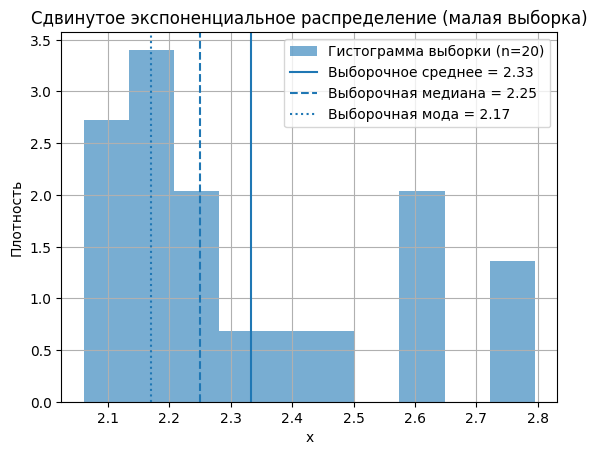

In [6]:
plt.figure()
plt.hist(sample_small, bins=10, density=True, alpha=0.6, label='Гистограмма выборки (n=20)')

plt.axvline(mean_small, linestyle='-', label=f'Выборочное среднее = {mean_small:.2f}')
plt.axvline(median_small, linestyle='--', label=f'Выборочная медиана = {median_small:.2f}')
plt.axvline(mode_small, linestyle=':', label=f'Выборочная мода = {mode_small:.2f}')

plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Сдвинутое экспоненциальное распределение (малая выборка)')
plt.legend()
plt.grid(True)
plt.show()


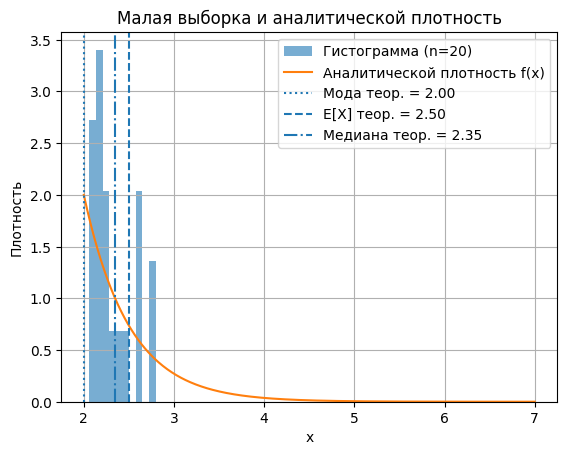

In [7]:
plt.figure()
plt.hist(sample_small, bins=10, density=True, alpha=0.6, label='Гистограмма (n=20)')
plt.plot(x_grid, pdf_vals, label='Аналитической плотность f(x)')

plt.axvline(mode_theor, linestyle=':', label=f'Мода теор. = {mode_theor:.2f}')
plt.axvline(EX_theor, linestyle='--', label=f'E[X] теор. = {EX_theor:.2f}')
plt.axvline(median_theor, linestyle='-.', label=f'Медиана теор. = {median_theor:.2f}')

plt.xlabel('x')
plt.ylabel('Плотность')
plt.title('Малая выборка и аналитической плотность')
plt.legend()
plt.grid(True)
plt.show()


# Задание 3

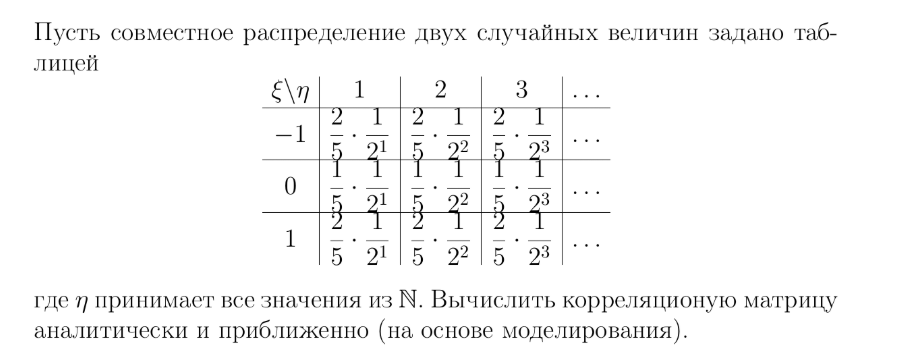

# Решение 3

Случайная величина ξ принимает значения −1, 0, 1 с вероятностями

$$
\mathbb{P}(\xi=-1)=\frac{2}{5},\quad
\mathbb{P}(\xi=0)=\frac{1}{5},\quad
\mathbb{P}(\xi=1)=\frac{2}{5}.
$$

Случайная величина η имеет геометрическое распределение

$$
\mathbb{P}(\eta=j)=\frac{1}{2^{j}},\quad j=1,2,\dots
$$

Они независимы

$$
\operatorname{Cov}(\xi,\eta)=0,\qquad \rho(\xi,\eta)=0.
$$

Корреляционная матрица

$$
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

In [8]:
x_vals = [-1, 0, 1]
p_vals = [2/5, 1/5, 2/5]
xi = np.random.choice(x_vals, size=10000, p=p_vals)

eta = np.random.geometric(p=0.5, size=10000)

print("E[xi] =", xi.mean())
print("Var(xi) =", xi.var(ddof=1))

print("E[eta] =", eta.mean())
print("Var(eta) =", eta.var(ddof=1))

print("Корреляционная матрица:")
print(np.corrcoef(xi, eta))


E[xi] = -0.0097
Var(xi) = 0.7934852585258525
E[eta] = 1.9744
Var(eta) = 1.9343380738073805
Корреляционная матрица:
[[ 1.        -0.0119863]
 [-0.0119863  1.       ]]
